# Parallel computing
- Parallel computing is a type of computing architecture in which several processors execute or process an application or computation simultaneously. Large problems can often be divided into smaller ones, which can then be solved at the same time.

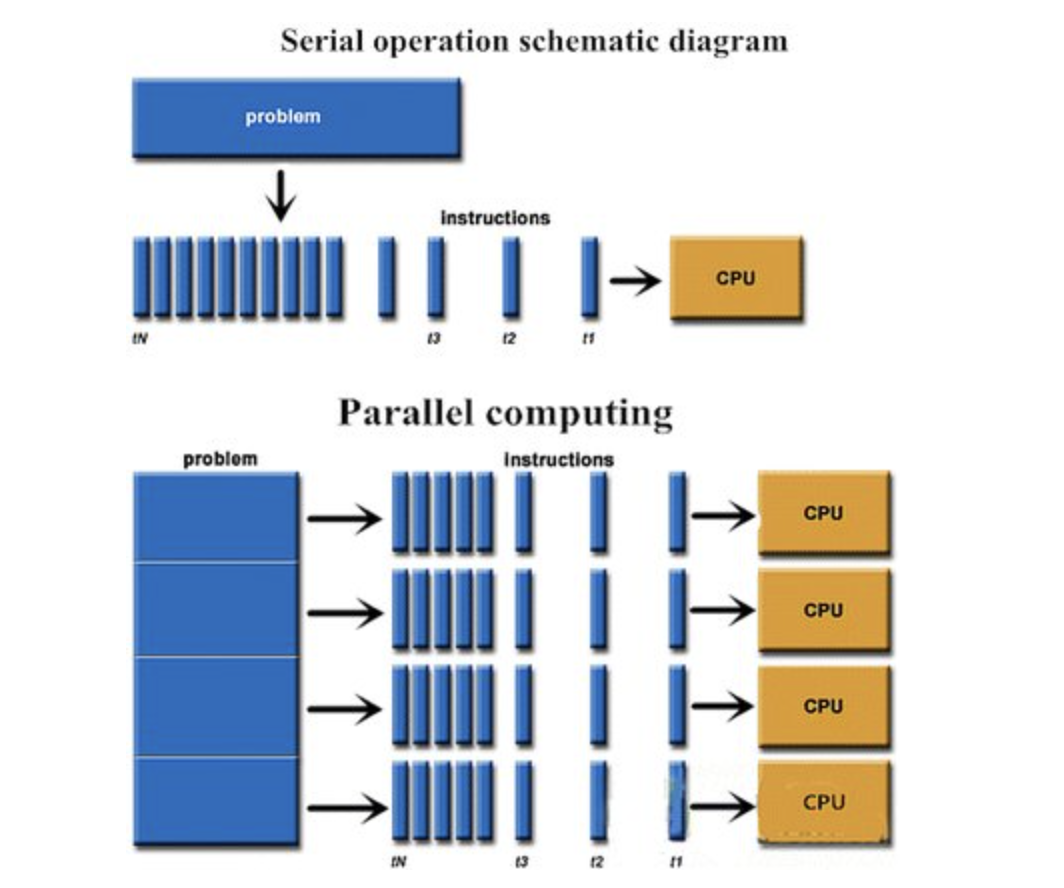

# Threading


- A thread definition: is a separate flow of execution. This means that your program will have two things or more happening at once.
- threading allows the program to __speed up__ the execution

## Threading in Python

### - In Python, the threading module is a built-in module which is known as threading and can be directly imported.

In [3]:
import threading
import time

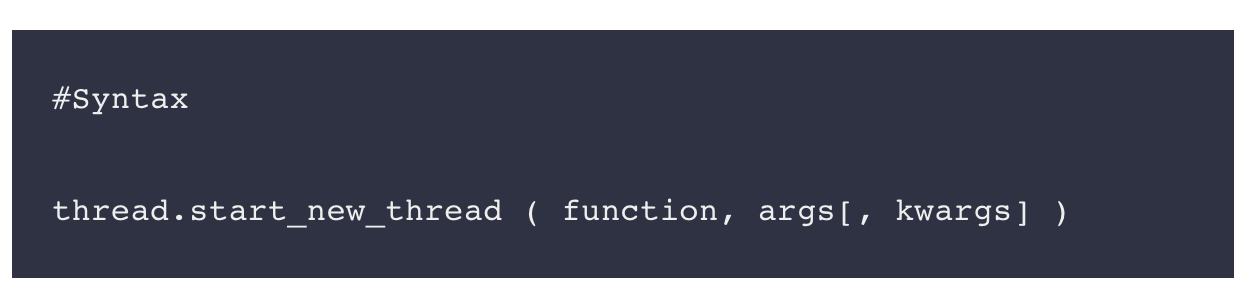

### To create a new thread, we create an object of Thread class. It takes following arguments:
- target: the function to be executed by thread
- args: the arguments to be passed to the target function
In above example, we created 2 threads with different target functions:

In [4]:
def test_thread(seconds):
    time.sleep(seconds)
    print('done ',seconds)

In [6]:
t1=threading.Thread(target=test_thread,args=(3,))
t2=threading.Thread(target=test_thread,args=(5,))
t1.start()
t2.start()
t1.join()
t2.join()
print('All done')

done  3
done  5
All done


In [15]:
th=[]
for i in range(1,11):
    t=threading.Thread(target=test_thread,args=(i/2,))
    t.start()
    th.append(t)
for t in th:
    t.join()
print('All threads are done')

done  0.5
done  1.0
done  1.5
done  2.0
done  2.5
done  3.0
done  3.5
done  4.0
done  4.5
done  5.0
All threads are done


### Start threading

In [14]:
#Python multithreading example.
#1. Calculate factorial using recursion.
#2. Call factorial function using thread. 

import threading
from time import sleep

threadId = 1 # thread counter
waiting = 2 # 2 sec. waiting time

def factorial(n):
    global threadId
    rc = 0
    
    if n < 1:   # base case
        print("{}: {}".format('\nThread', threadId ))
        threadId += 1
        rc = 1
    else:
        returnNumber = n * factorial( n - 1 )  # recursive call
        print("{} != {}".format(str(n), str(returnNumber)))
        rc = returnNumber
    
    return rc

t1=threading.Thread(target=factorial, args=(5,))
t2=threading.Thread(target=factorial, args=(4,))

## start threading
t1.start()
t2.start()

t1.join()
t2.join()


sleep(waiting)


Thread: 1
1 != 1
2 != 2
3 != 6
4 != 24
5 != 120

Thread: 2
1 != 1
2 != 2
3 != 6
4 != 24


In [20]:
def do_sometning(seconds):
    print('Sleeping {} seconds .....'.format(seconds))
    time.sleep(1)

## How to release 10 threads

In [19]:
## this code is here



finish=time.perf_counter()
print(finish)






2103.24396112


- __Race condition__ is a significant problem in concurrent programming. The condition occurs when one thread tries to modify a shared resource at the same time that another thread is modifying that resource – t​his leads to garbled output, which is why threads need to be synchronized.

- The threading module of Python includes locks as a synchronization tool. A lock has two states:

   - locked
   - unlocked
A lock can be locked using the acquire() method. Once a thread has acquired the lock, all subsequent attempts to acquire the lock are blocked until it is released. The lock can be released using the release() method.

In [14]:
import threading 
deposit = 100
# Function to add profit to the deposit
def add_profit(): 
    global deposit
    for i in range(100000):
        deposit = deposit + 10
# Function to deduct money from the deposit
def pay_bill(): 
    global deposit
    for i in range(100000):
        deposit = deposit - 10
# Creating threads
thread1 = threading.Thread(target = add_profit, args = ())
thread2 = threading.Thread(target = pay_bill, args = ())
# Starting the threads
thread1.start() 
thread2.start()
# Waiting for both the threads to finish executing 
thread1.join()
thread2.join()
# Displaying the final value of the deposit
print(deposit)

100


### Using a lock to solve the problem
- The code between the acquire() and release() methods are executed atomically so that there is no chance that a thread will read a non-updated version after another thread has already made a change.

In [38]:
import threading 
# Declraing a lock
lock = threading.Lock()
deposit = 100

In [15]:
def add_profit(): 
    global deposit
    for i in range(100000):
        lock.acquire()
        deposit = deposit + 10
        lock.release()
# Function to deduct money from the deposit
def pay_bill(): 
    global deposit
    for i in range(100000):
        lock.acquire()
        deposit = deposit - 10
        lock.release()
# Creating threads
thread1 = threading.Thread(target = add_profit, args = ())
thread2 = threading.Thread(target = pay_bill, args = ())
# Starting the threads  
thread1.start() 
thread2.start() 
# Waiting for both the threads to finish executing 
thread1.join()
thread2.join()
# Displaying the final value of the deposit
print(deposit)

100


Exception in thread Thread-25:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-15-f88f9e66e577>", line 11, in pay_bill
    lock.acquire()
NameError: name 'lock' is not defined
Exception in thread Thread-24:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-15-f88f9e66e577>", line 4, in add_profit
    lock.acquire()
NameError: name 'lock' is not defined


